In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

%matplotlib inline

# Importing 3 dataframes:
df_test_control = Variation (Checks who is control and who is test) 

df_concat = Dataframe of online behaviour of clients when doing "start - confirm" steps and time frames

df_demo = age, tenure, balance, etc. of clients

In [6]:
url1 = ('/Users/javi/Desktop/Ironhack/Entregas de github/Ironhack-Project-2/Raw data/df_final_demo_cleaned.csv')
url2 = ('/Users/javi/Desktop/Ironhack/Entregas de github/Ironhack-Project-2/Raw data/df_final_experiment_clients_cleaned.csv')
url3 = ('/Users/javi/Desktop/Ironhack/Entregas de github/Ironhack-Project-2/Raw data/df_final_web_concat.csv')
df_demo = pd.read_csv(url1)
df_test_control = pd.read_csv(url2)
df_concat = pd.read_csv(url3)

In [7]:
df_demo.shape

(70595, 9)

In [8]:
# Count occurrences where the value in the 'process_step' column is 'start'
start_count = (df_test_control['Variation'] == 'Test').sum()

print("Number of occurrences where 'process_step' is 'start':", start_count)


Number of occurrences where 'process_step' is 'start': 26968


In [9]:
df_concat.head(10)

,client_id,visitor_id,visit_id,process_step,date_time
0,9088444,242404224_96732670250,423038079_46067236368_400417,step_3,2017-03-15 00:03:03
1,7179755,167765295_97487764427,264484508_5982901710_928530,start,2017-03-15 00:19:28
2,7179755,167765295_97487764427,264484508_5982901710_928530,step_1,2017-03-15 00:20:50
3,7179755,167765295_97487764427,264484508_5982901710_928530,step_2,2017-03-15 00:22:52
4,7179755,167765295_97487764427,264484508_5982901710_928530,step_3,2017-03-15 00:23:47
5,7179755,167765295_97487764427,264484508_5982901710_928530,confirm,2017-03-15 00:26:24
6,4192640,692067844_75217592829,706721307_85347845958_18583,start,2017-03-15 00:43:23
7,4192640,692067844_75217592829,706721307_85347845958_18583,step_1,2017-03-15 00:43:32
8,4192640,692067844_75217592829,706721307_85347845958_18583,step_2,2017-03-15 00:43:48
9,4192640,692067844_75217592829,706721307_85347845958_18583,step_1,2017-03-15 00:44:36


In [10]:
df_demo.head()

,client_id,years_as_client,months_as_client,age,gender,number_of_accounts,total_balance,calls_in_the_last_6_months,frequency_of_logons_6_months
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [11]:
df_test_control.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


# Merging Variation and df_concat on their client_id

In [12]:
# Step 1: Merge df_test_control with df_concat
merged_df = pd.merge(df_concat, df_test_control, on='client_id', how='inner')

In [13]:
merged_df

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,7179755,167765295_97487764427,264484508_5982901710_928530,start,2017-03-15 00:19:28,Control
1,7179755,167765295_97487764427,264484508_5982901710_928530,step_1,2017-03-15 00:20:50,Control
2,7179755,167765295_97487764427,264484508_5982901710_928530,step_2,2017-03-15 00:22:52,Control
3,7179755,167765295_97487764427,264484508_5982901710_928530,step_3,2017-03-15 00:23:47,Control
4,7179755,167765295_97487764427,264484508_5982901710_928530,confirm,2017-03-15 00:26:24,Control
...,...,...,...,...,...,...
321190,291330,992344309_24884468623,91879336_25502670457_529422,step_1,2017-06-20 23:21:41,Control
321191,1558312,397562195_28573798537,175513303_32086468382_224926,confirm,2017-06-20 23:26:00,Control
321192,6187864,113539532_90731779729,77393632_6804608909_354572,start,2017-06-20 23:56:17,Control
321193,6187864,113539532_90731779729,77393632_6804608909_354572,step_1,2017-06-20 23:56:30,Control


Checking which column we should go by 

In [14]:
# Group by Variation and count unique values for client_id, visit_id, and visitor_id
grouped_control = merged_df[merged_df['Variation'] == 'Control'].groupby('Variation').agg(
    {'client_id': 'nunique', 'visit_id': 'nunique', 'visitor_id': 'nunique'}
)
grouped_test = merged_df[merged_df['Variation'] == 'Test'].groupby('Variation').agg(
    {'client_id': 'nunique', 'visit_id': 'nunique', 'visitor_id': 'nunique'}
)

# Combine the two groups
combined = pd.concat([grouped_control, grouped_test])

# Calculate percentages
total_client_id = merged_df['client_id'].nunique()
total_visit_id = merged_df['visit_id'].nunique()
total_visitor_id = merged_df['visitor_id'].nunique()

combined['Percentage_client_id'] = round((combined['client_id'] / total_client_id) * 100, 2)
combined['Percentage_visit_id'] = round((combined['visit_id'] / total_visit_id) * 100, 2)
combined['Percentage_visitor_id'] = round((combined['visitor_id'] / total_visitor_id) * 100, 2)

combined


,client_id,visit_id,visitor_id,Percentage_client_id,Percentage_visit_id,Percentage_visitor_id
Variation,,,,,,
Control,23526,32181,26271,46.6,46.52,46.92
Test,26961,37122,29908,53.4,53.66,53.41


After some checking and calculations... We came to the conclusion that we need to go by visit_id. since the variation is not so big percetage wise but we can tell that the ratios of error, success and time are more accurate when taking into account visit_id which should be a unique session of a client as the metadata has shown. 

In [15]:
#This is to check if a visitor_id or visit_id can be shared amongst multiple client_id. Depending on the result we have to adapt our code accordingly so we don't get skewed results once we are doing an analysis.

def check_unique_ids(df):
    # Check if each client_id has unique visitor_id
    unique_visitor_id_per_client = df.groupby('client_id')['visitor_id'].nunique()
    if unique_visitor_id_per_client.max() > 1:
        print("Some client_id have non-unique visitor_id:")
        print(unique_visitor_id_per_client[unique_visitor_id_per_client > 1])

    # Check if each client_id has unique visit_id
    unique_visit_id_per_client = df.groupby('client_id')['visit_id'].nunique()
    if unique_visit_id_per_client.max() > 1:
        print("Some client_id have non-unique visit_id:")
        print(unique_visit_id_per_client[unique_visit_id_per_client > 1])

    # Check if each visitor_id or visit_id is present among multiple client_id
    unique_client_id_per_visitor = df.groupby('visitor_id')['client_id'].nunique()
    unique_client_id_per_visit = df.groupby('visit_id')['client_id'].nunique()
    if unique_client_id_per_visitor.max() > 1:
        print("Some visitor_id are associated with multiple client_id:")
        unique_client_id_per_visitor[unique_client_id_per_visitor > 1]
    if unique_client_id_per_visit.max() > 1:
        print("Some visit_id are associated with multiple client_id:")
        unique_client_id_per_visit[unique_client_id_per_visit > 1].value_counts

# Usage example
check_unique_ids(merged_df)


Some client_id have non-unique visitor_id:
client_id
1643       2
11070      2
11309      2
13831      2
16135      2
          ..
9992821    2
9994407    2
9996404    2
9997470    2
9999729    3
Name: visitor_id, Length: 4798, dtype: int64
Some client_id have non-unique visit_id:
client_id
1104       2
1186       2
1336       2
1516       2
1643       3
          ..
9995265    2
9996404    2
9997470    3
9998964    2
9999729    3
Name: visit_id, Length: 12989, dtype: int64
Some visitor_id are associated with multiple client_id:
Some visit_id are associated with multiple client_id:


In order to calculate accurately the time for each step we need to make sure the calculation are done correctly we are going to sort everything by date (to calculate time frames.), client_id that have their own visit_id (since multiple client_id can have the same visit_id)

In [16]:
# Sort the dataframe by 'date_time' and reset index
merged_df_sorted = merged_df.sort_values(by=['date_time']).reset_index(drop=True)

# Display the sorted and reindexed dataframe
merged_df_sorted.head()


,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,7179755,167765295_97487764427,264484508_5982901710_928530,start,2017-03-15 00:19:28,Control
1,7179755,167765295_97487764427,264484508_5982901710_928530,step_1,2017-03-15 00:20:50,Control
2,7179755,167765295_97487764427,264484508_5982901710_928530,step_2,2017-03-15 00:22:52,Control
3,7179755,167765295_97487764427,264484508_5982901710_928530,step_3,2017-03-15 00:23:47,Control
4,7179755,167765295_97487764427,264484508_5982901710_928530,confirm,2017-03-15 00:26:24,Control


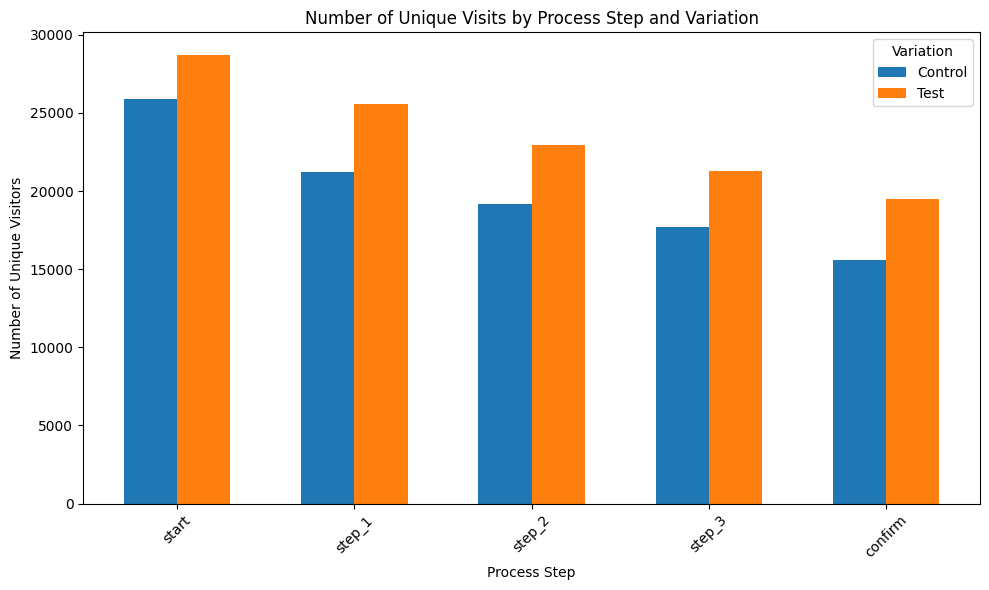

In [17]:
# Step 2: Filter merged dataframe to include only clients present in both df_concat and df_test_control
filtered_df = merged_df_sorted[merged_df_sorted['client_id'].isin(df_test_control['client_id'])]

# Step 3: Filter the dataframe to include only clients who have completed all steps from start to confirm
filtered_df = filtered_df[filtered_df['process_step'].isin(['start', 'step_1', 'step_2', 'step_3', 'confirm'])]

# Step 4: Group by process step and variation and count the number of unique visitor IDs
grouped_df = filtered_df.groupby(['process_step', 'Variation'])['visitor_id'].nunique().unstack()

# Step 5: Calculate total number of unique visitor IDs for each process step and sort the dataframe
grouped_df['Total'] = grouped_df.sum(axis=1)
grouped_df = grouped_df.sort_values(by='Total', ascending=False)
grouped_df.drop(columns='Total', inplace=True)

# Step 6: Plot the results as stacked bar charts side by side
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.30
index = range(len(grouped_df.index))

# Plot bars for 'Control' and 'Test' side by side for each process step
bar1 = ax.bar(index, grouped_df['Control'], bar_width, label='Control')
bar2 = ax.bar([i + bar_width for i in index], grouped_df['Test'], bar_width, label='Test')

# Set title, labels, and ticks
ax.set_title('Number of Unique Visits by Process Step and Variation')
ax.set_xlabel('Process Step')
ax.set_ylabel('Number of Unique Visitors')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(grouped_df.index, rotation=45)
ax.legend(title='Variation')

plt.tight_layout()
plt.show()


Completion rate by visitor_id

In [18]:
# Function to calculate completion rate for Test and Control variations
def calculate_completion_rate_visitor_id(merged_df_sorted):
    # Sort by visitor_id to ensure correct calculation
    merged_df_sorted = merged_df_sorted.sort_values(by=['visitor_id'])
    
    # Calculate completion rate for Control variation
    _visitor_id = merged_df_sorted[(merged_df_sorted['Variation'] == 'Control') & 
                                                    (merged_df_sorted['process_step'] == 'confirm')]['visitor_id'].nunique()
    control_start_visits_count_visitor_id = merged_df_sorted[(merged_df_sorted['Variation'] == 'Control') & 
                                                    (merged_df_sorted['process_step'] == 'start')]['visitor_id'].nunique()
    control_completion_rate_visitor_id = _visitor_id / control_start_visits_count_visitor_id * 100
    
    # Calculate completion rate for Test variation
    test_confirm_visits_count_visitor_id = merged_df_sorted[(merged_df_sorted['Variation'] == 'Test') & 
                                                 (merged_df_sorted['process_step'] == 'confirm')]['visitor_id'].nunique()
    test_start_visits_count_visitor_id = merged_df_sorted[(merged_df_sorted['Variation'] == 'Test') & 
                                                 (merged_df_sorted['process_step'] == 'start')]['visitor_id'].nunique()
    test_completion_rate_visitor_id = test_confirm_visits_count_visitor_id / test_start_visits_count_visitor_id * 100
    
    return control_completion_rate_visitor_id, test_completion_rate_visitor_id

# Example usage
control_completion_rate_visitor_id, test_completion_rate_visitor_id = calculate_completion_rate_visitor_id(merged_df_sorted)
print("Completion Rate per visitor_id for Control Variation:", control_completion_rate_visitor_id)
print("Completion Rate per visitor_id for Test Variation:", test_completion_rate_visitor_id)


Completion Rate per visitor_id for Control Variation: 60.07258126785576
Completion Rate per visitor_id for Test Variation: 67.87927313235397


Completion Rate by client_id

In [19]:
# Function to calculate completion rate for Test and Control variations
def calculate_completion_rate_client_id(merged_df_sorted):
    # Sort by client_id to ensure correct calculation
    merged_df_sorted = merged_df_sorted.sort_values(by=['client_id'])
    
    # Calculate completion rate for Control variation
    control_confirm_visits_count_client_id = merged_df_sorted[(merged_df_sorted['Variation'] == 'Control') & 
                                                    (merged_df_sorted['process_step'] == 'confirm')]['client_id'].nunique()
    control_start_visits_count_client_id = merged_df_sorted[(merged_df_sorted['Variation'] == 'Control') & 
                                                    (merged_df_sorted['process_step'] == 'start')]['client_id'].nunique()
    control_completion_rate_client_id = control_confirm_visits_count_client_id / control_start_visits_count_client_id * 100
    
    # Calculate completion rate for Test variation
    test_confirm_visits_count_client_id = merged_df_sorted[(merged_df_sorted['Variation'] == 'Test') & 
                                                 (merged_df_sorted['process_step'] == 'confirm')]['client_id'].nunique()
    test_start_visits_count_client_id = merged_df_sorted[(merged_df_sorted['Variation'] == 'Test') & 
                                                 (merged_df_sorted['process_step'] == 'start')]['client_id'].nunique()
    test_completion_rate_client_id = test_confirm_visits_count_client_id / test_start_visits_count_client_id * 100
    
    return control_completion_rate_client_id, test_completion_rate_client_id

# Example usage
control_completion_rate_client_id, test_completion_rate_client_id = calculate_completion_rate_client_id(merged_df_sorted)
print("Completion Rate per client_id for Control Variation:", control_completion_rate_client_id)
print("Completion Rate per client_id for Test Variation:", test_completion_rate_client_id)


Completion Rate per client_id for Control Variation: 65.95699200547219
Completion Rate per client_id for Test Variation: 70.04349130173965


Completion Rate by Visit_id

In [20]:
# Function to calculate completion rate for Test and Control variations
def calculate_completion_rate_visit_id(merged_df_sorted):
    # Sort by visit_id to ensure correct calculation
    merged_df_sorted = merged_df_sorted.sort_values(by=['client_id','visit_id'])
    
    # Calculate completion rate for Control variation
    control_confirm_visits_count_visit_id = merged_df_sorted[(merged_df_sorted['Variation'] == 'Control') & 
                                                    (merged_df_sorted['process_step'] == 'confirm')]['visit_id'].nunique()
    _visit_id = merged_df_sorted[(merged_df_sorted['Variation'] == 'Control') & 
                                                    (merged_df_sorted['process_step'] == 'start')]['visit_id'].nunique()
    control_completion_rate_visit_id = control_confirm_visits_count_visit_id / _visit_id * 100
    
    # Calculate completion rate for Test variation
    test_confirm_visits_count_visit_id = merged_df_sorted[(merged_df_sorted['Variation'] == 'Test') & 
                                                 (merged_df_sorted['process_step'] == 'confirm')]['visit_id'].nunique()
    test_start_visits_count_visit_id = merged_df_sorted[(merged_df_sorted['Variation'] == 'Test') & 
                                                 (merged_df_sorted['process_step'] == 'start')]['visit_id'].nunique()
    test_completion_rate_visit_id = test_confirm_visits_count_visit_id / test_start_visits_count_visit_id * 100
    
    return control_completion_rate_visit_id, test_completion_rate_visit_id

# Example usage
control_completion_rate_visit_id, test_completion_rate_visit_id = calculate_completion_rate_visit_id(merged_df_sorted)
print("Completion Rate for Control Variation:", control_completion_rate_visit_id)
print("Completion Rate for Test Variation:", test_completion_rate_visit_id)


Completion Rate for Control Variation: 51.901109924602785
Completion Rate for Test Variation: 65.54730871349264


Counting the time in each step! by visit_id

In [21]:
# Function to calculate time spent on each step for different variations
def calculate_time_spent_on_each_step_by_variation(merged_df_sorted):
    # Convert date_time column to datetime type
    merged_df_sorted['date_time'] = pd.to_datetime(merged_df_sorted['date_time'])
    
    # Sort by date_time to ensure correct calculation of time differences
    merged_df_sorted.sort_values(by=['visit_id', 'date_time'], inplace=True)
    
    # Calculate time differences between consecutive steps for each user
    merged_df_sorted['time_diff'] = merged_df_sorted.groupby('visit_id')['date_time'].diff().dt.total_seconds()
    
    # Aggregate time differences for each step for Control and Test variations separately
    time_spent_by_variation = merged_df_sorted.groupby(['Variation', 'process_step'])['time_diff'].mean()
    
    return time_spent_by_variation

# Example usage
time_spent_on_each_step_by_variation = calculate_time_spent_on_each_step_by_variation(merged_df_sorted)
print("Time Spent on Each Step by Variation (in seconds):\n", time_spent_on_each_step_by_variation)


Time Spent on Each Step by Variation (in seconds):
 Variation  process_step
Control    confirm         128.473439
           start           153.805080
           step_1           43.004426
           step_2           38.592089
           step_3           93.174803
Test       confirm         128.890217
           start           148.361580
           step_1           37.703994
           step_2           48.058169
           step_3           96.913505
Name: time_diff, dtype: float64


Time difference between each step for customers that have reached the CONFIRM stage.

In [22]:
# Function to calculate average time spent per visit_id for each step and Variation (Control/Test)
def calculate_average_time_spent_per_step(merged_df_sorted):
    # Convert date_time column to datetime type
    merged_df_sorted['date_time'] = pd.to_datetime(merged_df_sorted['date_time'])
    
    # Sort by date_time to ensure correct calculation of time differences
    merged_df_sorted.sort_values(by=['visit_id', 'date_time'], inplace=True)
    
    # Calculate time differences between consecutive steps for each user
    merged_df_sorted['time_diff'] = merged_df_sorted.groupby('visit_id')['date_time'].diff().dt.total_seconds()
    
    # Mark visits with successful completion (contains all required steps)
    completed_visits = merged_df_sorted.groupby('visit_id').filter(lambda x: set(x['process_step']) >= set(['start', 'step_1', 'step_2', 'step_3', 'confirm']))
    
    # Calculate total time spent per step for each Variation
    total_time_spent_per_step = completed_visits.groupby(['Variation', 'process_step'])['time_diff'].mean()
    
    return total_time_spent_per_step

# Example usage
average_time_spent_per_step = calculate_average_time_spent_per_step(merged_df_sorted)
print("Average Time Spent per step (in seconds) by Variation and process_step for visit_id of clients that have reached confirm:\n", average_time_spent_per_step)


Average Time Spent per step (in seconds) by Variation and process_step for visit_id of clients that have reached confirm:
 Variation  process_step
Control    confirm         126.836356
           start           196.569289
           step_1           41.369445
           step_2           36.578549
           step_3           89.588151
Test       confirm         124.584787
           start           170.330714
           step_1           35.006254
           step_2           41.995070
           step_3           91.971449
Name: time_diff, dtype: float64


Total average time for Control and Test 

In [23]:
# Function to calculate average time spent per visit_id for each Variation and client_id
def calculate_average_time_spent_per_visit(merged_df):
    # Convert date_time column to datetime type
    merged_df['date_time'] = pd.to_datetime(merged_df['date_time'])
    
    # Sort by date_time to ensure correct calculation of time differences
    merged_df.sort_values(by=['visit_id', 'date_time'], inplace=True)
    
    # Calculate time differences between consecutive steps for each user
    merged_df['time_diff'] = merged_df.groupby('visit_id')['date_time'].diff().dt.total_seconds()
    
    # Mark visits with successful completion (from start to confirm)
    completed_visits = merged_df.groupby('visit_id').filter(lambda x: set(x['process_step']) == set(['start', 'step_1', 'step_2', 'step_3', 'confirm']))
    
    # Calculate total time spent per visit_id for each Variation and client_id
    total_time_spent_per_visit = completed_visits.groupby(['Variation', 'client_id', 'visit_id'])['time_diff'].sum()
    
    # Calculate average time spent per visit_id for each Variation and client_id
    average_time_spent_per_visit = total_time_spent_per_visit.groupby(['Variation', 'client_id']).mean()
    
    return average_time_spent_per_visit

# Example usage
average_time_spent_per_visit = calculate_average_time_spent_per_visit(merged_df)
print("Average Time Spent per visit_id (in seconds) by Variation and client_id:\n", average_time_spent_per_visit)


Average Time Spent per visit_id (in seconds) by Variation and client_id:
 Variation  client_id
Control    1195         245.0
           1197          95.0
           3743         292.0
           5354          90.0
           6642         443.0
                        ...  
Test       9998773      295.0
           9998851      165.0
           9999009      171.0
           9999400      119.0
           9999729       75.0
Name: time_diff, Length: 32683, dtype: float64


In [24]:
# Calculate total average time for Test and Control
total_average_time_test = average_time_spent_per_visit.loc['Test'].mean()
total_average_time_control = average_time_spent_per_visit.loc['Control'].mean()

print("Total Average Time for Test (in seconds):", total_average_time_test)
print("Total Average Time for Control (in seconds):", total_average_time_control)


Total Average Time for Test (in seconds): 420.16950386381455
Total Average Time for Control (in seconds): 413.3314446318156


Total average time for Control and Test removing outliers

In [25]:
# Function to remove outliers using IQR method
def remove_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Remove outliers from Test data
test_data = average_time_spent_per_visit.loc['Test']
test_data_no_outliers = remove_outliers(test_data)

# Remove outliers from Control data
control_data = average_time_spent_per_visit.loc['Control']
control_data_no_outliers = remove_outliers(control_data)

# Calculate total average time for Test and Control after removing outliers
total_average_time_test_no_outliers = test_data_no_outliers.mean()
total_average_time_control_no_outliers = control_data_no_outliers.mean()

print("Total Average Time for Test (without outliers, in seconds):", total_average_time_test_no_outliers)
print("Total Average Time for Control (without outliers, in seconds):", total_average_time_control_no_outliers)


Total Average Time for Test (without outliers, in seconds): 292.7642238998343
Total Average Time for Control (without outliers, in seconds): 313.9793149847095


Now we should calculate the error rate in each step and find out where the problem lies for most users and we are seperating Control and Test

ERROR RATE BY STEP < Next step

In [26]:
def calculate_error_rate(merged_df_sorted):
    # Convert date_time column to datetime type
    merged_df_sorted['date_time'] = pd.to_datetime(merged_df_sorted['date_time'])
    
    # Sort by date_time to ensure correct calculation of time differences
    merged_df_sorted.sort_values(by=['visit_id', 'date_time'], inplace=True)
    
    # Map each process step to a numerical value
    step_mapping = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}
    
    # Assign numerical values to each process step
    merged_df_sorted['step_value'] = merged_df_sorted['process_step'].map(step_mapping)
    
    # Shift the step_value column by 1 to compare with the previous step
    merged_df_sorted['prev_step_value'] = merged_df_sorted.groupby(['client_id', 'visit_id'])['step_value'].shift(1)
    
    # Identify visits where the current step is less than the previous step (excluding 'confirm')
    error_visits = merged_df_sorted[(merged_df_sorted['step_value'] < merged_df_sorted['prev_step_value']) & (merged_df_sorted['process_step'] != 'confirm')]
    
    # Group by Variation and process_step and calculate counts
    error_counts = error_visits.groupby(['Variation', 'process_step']).size().unstack(fill_value=0)
    
    # Calculate total counts per Variation
    total_error_counts = error_counts.sum(axis=1)
    
    # Calculate error rate per process step
    error_rate = error_counts.div(total_error_counts, axis=0) * 100
    
    # Sort error rate by process step order
    error_rate = error_rate.reindex(columns=['start', 'step_1', 'step_2', 'step_3', 'confirm'])
    
    # Find the step with the highest error rate for each Variation
    max_error_step = error_rate.idxmax(axis=1)
    max_error_percentage = error_rate.max(axis=1)
    
    return error_counts, error_rate, max_error_step, max_error_percentage

# Example usage
error_counts, error_rate, max_error_step, max_error_percentage = calculate_error_rate(merged_df_sorted)
print("Error Counts by Variation and Process Step:\n", error_counts)
print("\nError Rate by Variation and Process Step:\n", error_rate)
print("\nStep with the highest error rate for each Variation:", max_error_step)
print("\nHighest error rate percentage for each Variation:\n", max_error_percentage)


Error Counts by Variation and Process Step:
 process_step  start  step_1  step_2  step_3
Variation                                  
Control        4808    2307    2363     116
Test          10513    3414    2291      28

Error Rate by Variation and Process Step:
 process_step      start     step_1     step_2    step_3  confirm
Variation                                                       
Control       50.114655  24.046279  24.629977  1.209089      NaN
Test          64.711314  21.014404  14.101933  0.172350      NaN

Step with the highest error rate for each Variation: Variation
Control    start
Test       start
dtype: object

Highest error rate percentage for each Variation:
 Variation
Control    50.114655
Test       64.711314
dtype: float64


ERROR RATE BY STEP <= Next step

In [27]:
def calculate_error_rate(merged_df_sorted):
    # Convert date_time column to datetime type
    merged_df_sorted['date_time'] = pd.to_datetime(merged_df_sorted['date_time'])
    
    # Sort by date_time to ensure correct calculation of time differences
    merged_df_sorted.sort_values(by=['visit_id', 'date_time'], inplace=True)
    
    # Map each process step to a numerical value
    step_mapping = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}
    
    # Assign numerical values to each process step
    merged_df_sorted['step_value'] = merged_df_sorted['process_step'].map(step_mapping)
    
    # Shift the step_value column by 1 to compare with the previous step
    merged_df_sorted['prev_step_value'] = merged_df_sorted.groupby(['client_id','visit_id'])['step_value'].shift(1)
    
    # Identify visits where the current step is less than the previous step (excluding 'confirm')
    merged_df_sorted['error_flags'] = 0  # Initialize error_flags column with 0
    merged_df_sorted.loc[(merged_df_sorted['process_step'] != 'confirm') & (merged_df_sorted['step_value'] <= merged_df_sorted['prev_step_value']), 'error_flags'] = 1
    
    # Group by Variation and process_step and calculate counts
    error_counts = merged_df_sorted[merged_df_sorted['error_flags'] == 1].groupby(['Variation', 'process_step']).size().unstack(fill_value=0)
    
    # Calculate total counts per Variation
    total_error_counts = error_counts.sum(axis=1)
    
    # Calculate error rate per process step
    error_rate = error_counts.div(total_error_counts, axis=0) * 100
    
    # Sort error rate by process step order
    error_rate = error_rate.reindex(columns=['start', 'step_1', 'step_2', 'step_3', 'confirm'])
    
    # Find the step with the highest error rate for each Variation
    max_error_step = error_rate.idxmax(axis=1)
    max_error_percentage = error_rate.max(axis=1)
    
    return error_counts, error_rate, max_error_step, max_error_percentage

# Example usage
error_counts, error_rate, max_error_step, max_error_percentage = calculate_error_rate(merged_df_sorted)
print("Error Counts by Variation and Process Step:\n", error_counts)
print("\nError Rate by Variation and Process Step:\n", error_rate)
print("\nStep with the highest error rate for each Variation:", max_error_step)
print("\nHighest error rate percentage for each Variation:\n", max_error_percentage)


Error Counts by Variation and Process Step:
 process_step  start  step_1  step_2  step_3
Variation                                  
Control       16689    3614    3316    1149
Test          23408    5085    2951    1028

Error Rate by Variation and Process Step:
 process_step      start     step_1     step_2    step_3  confirm
Variation                                                       
Control       67.381298  14.591408  13.388243  4.639050      NaN
Test          72.086721  15.659645   9.087830  3.165804      NaN

Step with the highest error rate for each Variation: Variation
Control    start
Test       start
dtype: object

Highest error rate percentage for each Variation:
 Variation
Control    67.381298
Test       72.086721
dtype: float64


In [28]:
error_counts

process_step,start,step_1,step_2,step_3
Variation,,,,
Control,16689,3614,3316,1149
Test,23408,5085,2951,1028


In [44]:
# Filter the DataFrame for rows where the client ID is 3561384
specific_client_instances = merged_df_sorted[merged_df_sorted['client_id'] == 355337]

# Display all instances of the specific client
specific_client_instances


,client_id,visitor_id,visit_id,process_step,date_time,Variation,time_diff,step_value,prev_step_value,error_flags


In [45]:
merged_df_sorted.to_csv('/Users/javi/Desktop/Ironhack/Entregas de github/Ironhack-Project-2/Raw data/df_merged_sorted.csv',index=False,encoding='latin-1')

In [32]:
# Count occurrences where the value in the 'process_step' column is 'start'
start_count = (merged_df_sorted['process_step'] == 'step_1').sum()

print("Number of occurrences where 'process_step' is 'start':", start_count)


Number of occurrences where 'process_step' is 'start': 68410


Two sample T-testing between completion rate of Control and Test by **client_id**

In [33]:
def completion_rate_test(control_completion_rate_client_id, test_completion_rate_client_id, control_start_visits_count_client_id, test_start_visits_count_vistor_id, alpha=0.05):
    # Perform two-sample proportion z-test
    stat, p_value = st.ttest_ind([control_completion_rate_client_id, test_completion_rate_client_id],
                                             [control_start_visits_count_client_id, test_start_visits_count_vistor_id])
    
    if p_value < alpha:
        print("Reject null hypothesis: There is a significant difference in completion rates between Control and Test groups.")
    else:
        print("Fail to reject null hypothesis: There is no significant difference in completion rates between Control and Test groups.")

# Example usage
control_completion_rate_client_id, test_completion_rate_client_id = calculate_completion_rate_client_id(merged_df_sorted)
print("Completion Rate per client_id for Control Variation:", control_completion_rate_client_id)
print("Completion Rate per client_id for Test Variation:", test_completion_rate_client_id)

control_start_visits_count_client_id = merged_df_sorted[(merged_df_sorted['Variation'] == 'Control') & 
                                                (merged_df_sorted['process_step'] == 'start')]['client_id'].nunique()
test_start_visits_count_vistor_id = merged_df_sorted[(merged_df_sorted['Variation'] == 'Test') & 
                                             (merged_df_sorted['process_step'] == 'start')]['client_id'].nunique()

completion_rate_test(control_completion_rate_client_id, test_completion_rate_client_id, control_start_visits_count_client_id, test_start_visits_count_vistor_id)
print()
print(st.ttest_ind([control_completion_rate_client_id, test_completion_rate_client_id],[control_start_visits_count_client_id, test_start_visits_count_vistor_id]))

Completion Rate per client_id for Control Variation: 65.95699200547219
Completion Rate per client_id for Test Variation: 70.04349130173965
Reject null hypothesis: There is a significant difference in completion rates between Control and Test groups.

TtestResult(statistic=-15.216995059842077, pvalue=0.004290816735430989, df=2.0)


Adjusted 5%

In [34]:
# Adjust completion rate for Control Variation
adjusted_control_completion_rate_client_id = control_completion_rate_client_id + 5

print("Adjusted Completion Rate per client_id for Control Variation:", adjusted_control_completion_rate_client_id)
print("Adjusted Completion Rate per client_id for Control Variation:", test_completion_rate_client_id)
# Perform the completion rate test with the adjusted completion rate
completion_rate_test(adjusted_control_completion_rate_client_id, test_completion_rate_client_id, control_start_visits_count_client_id, test_start_visits_count_vistor_id)

# Print the result of the calculation
print()
print("T-test result with adjusted completion rate:")
print(st.ttest_ind([adjusted_control_completion_rate_client_id, test_completion_rate_client_id],[control_start_visits_count_client_id, test_start_visits_count_vistor_id]))


Adjusted Completion Rate per client_id for Control Variation: 70.95699200547219
Adjusted Completion Rate per client_id for Control Variation: 70.04349130173965
Reject null hypothesis: There is a significant difference in completion rates between Control and Test groups.

T-test result with adjusted completion rate:
TtestResult(statistic=-15.215482347380025, pvalue=0.004291664472995462, df=2.0)


Two sample T-testing between completion rate of Control and Test by **visitor_id**

In [35]:
def completion_rate_test(control_completion_rate_visitor_id, test_completion_rate_visitor_id, control_start_visits_count_visitor_id, test_start_visits_count_vistor_id, alpha=0.05):
    # Perform two-sample proportion z-test
    stat, p_value = st.ttest_ind([control_completion_rate_visitor_id, test_completion_rate_visitor_id],
                                             [control_start_visits_count_visitor_id, test_start_visits_count_vistor_id])
    
    if p_value < alpha:
        print("Reject null hypothesis: There is a significant difference in completion rates between Control and Test groups.")
    else:
        print("Fail to reject null hypothesis: There is no significant difference in completion rates between Control and Test groups.")

# Example usage
control_completion_rate_visitor_id, test_completion_rate_visitor_id = calculate_completion_rate_visitor_id(merged_df_sorted)
print("Completion Rate per visitor_id for Control Variation:", control_completion_rate_visitor_id)
print("Completion Rate per visitor_id for Test Variation:", test_completion_rate_visitor_id)

control_start_visits_count_visitor_id = merged_df_sorted[(merged_df_sorted['Variation'] == 'Control') & 
                                                (merged_df_sorted['process_step'] == 'start')]['visitor_id'].nunique()
test_start_visits_count_vistor_id = merged_df_sorted[(merged_df_sorted['Variation'] == 'Test') & 
                                             (merged_df_sorted['process_step'] == 'start')]['visitor_id'].nunique()

completion_rate_test(control_completion_rate_visitor_id, test_completion_rate_visitor_id, control_start_visits_count_visitor_id, test_start_visits_count_vistor_id)
print()
print(st.ttest_ind([control_completion_rate_visitor_id, test_completion_rate_visitor_id],[control_start_visits_count_visitor_id, test_start_visits_count_vistor_id]))

Completion Rate per visitor_id for Control Variation: 60.07258126785576
Completion Rate per visitor_id for Test Variation: 67.87927313235397
Reject null hypothesis: There is a significant difference in completion rates between Control and Test groups.

TtestResult(statistic=-19.298810164034204, pvalue=0.0026742014660393154, df=2.0)


Adjusted 5%

In [36]:
# Adjust completion rate for Control Variation
adjusted_control_completion_rate_visitor_id = control_completion_rate_visitor_id + 5

print("Adjusted Completion Rate per visitor_id for Control Variation:", adjusted_control_completion_rate_visitor_id)
print("Adjusted Completion Rate per visitor_id for Control Variation:", test_completion_rate_visitor_id)
# Perform the completion rate test with the adjusted completion rate
completion_rate_test(adjusted_control_completion_rate_visitor_id, test_completion_rate_visitor_id, control_start_visits_count_visitor_id, test_start_visits_count_vistor_id)

# Print the result of the calculation
print()
print("T-test result with adjusted completion rate:")
print(st.ttest_ind([adjusted_control_completion_rate_visitor_id, test_completion_rate_visitor_id],[control_start_visits_count_visitor_id, test_start_visits_count_vistor_id]))


Adjusted Completion Rate per visitor_id for Control Variation: 65.07258126785575
Adjusted Completion Rate per visitor_id for Control Variation: 67.87927313235397
Reject null hypothesis: There is a significant difference in completion rates between Control and Test groups.

T-test result with adjusted completion rate:
TtestResult(statistic=-19.29710383536444, pvalue=0.002674672518779644, df=2.0)


Two sample T-testing between completion rate of Control and Test by **visit_id**

In [37]:
def completion_rate_test(control_completion_rate_visit_id, test_completion_rate_visit_id, control_start_visits_count_visit_id, test_start_visits_count_vistor_id, alpha=0.05):
    # Perform two-sample proportion z-test
    stat, p_value = st.ttest_ind([control_completion_rate_visit_id, test_completion_rate_visit_id],
                                             [control_start_visits_count_visit_id, test_start_visits_count_vistor_id])
    
    if p_value < alpha:
        print("Reject null hypothesis: There is a significant difference in completion rates between Control and Test groups.")
    else:
        print("Fail to reject null hypothesis: There is no significant difference in completion rates between Control and Test groups.")

# Example usage
control_completion_rate_visit_id, test_completion_rate_visit_id = calculate_completion_rate_visit_id(merged_df_sorted)
print("Completion Rate per visit_id for Control Variation:", control_completion_rate_visit_id)
print("Completion Rate per visit_id for Test Variation:", test_completion_rate_visit_id)

control_start_visits_count_visit_id = merged_df_sorted[(merged_df_sorted['Variation'] == 'Control') & 
                                                (merged_df_sorted['process_step'] == 'start')]['visit_id'].nunique()
test_start_visits_count_vistor_id = merged_df_sorted[(merged_df_sorted['Variation'] == 'Test') & 
                                             (merged_df_sorted['process_step'] == 'start')]['visit_id'].nunique()

completion_rate_test(control_completion_rate_visit_id, test_completion_rate_visit_id, control_start_visits_count_visit_id, test_start_visits_count_vistor_id)
print()
print(st.ttest_ind([control_completion_rate_visit_id, test_completion_rate_visit_id],[control_start_visits_count_visit_id, test_start_visits_count_vistor_id]))

Completion Rate per visit_id for Control Variation: 51.901109924602785
Completion Rate per visit_id for Test Variation: 65.54730871349264
Reject null hypothesis: There is a significant difference in completion rates between Control and Test groups.

TtestResult(statistic=-28.526714127879117, pvalue=0.001226582828696947, df=2.0)


Adjusted for 5%

In [38]:
# Adjust completion rate for Control Variation
adjusted_control_completion_rate_visit_id = control_completion_rate_visit_id + 5

print("Adjusted Completion Rate per visit_id for Control Variation:", adjusted_control_completion_rate_visit_id)
print("Adjusted Completion Rate per visit_id for Control Variation:", test_completion_rate_visit_id)
# Perform the completion rate test with the adjusted completion rate
completion_rate_test(adjusted_control_completion_rate_visit_id, test_completion_rate_visit_id, control_start_visits_count_visit_id, test_start_visits_count_vistor_id)

# Print the result of the calculation
print()
print("T-test result with adjusted completion rate:")
print(st.ttest_ind([adjusted_control_completion_rate_visit_id, test_completion_rate_visit_id],[control_start_visits_count_visit_id, test_start_visits_count_vistor_id]))


Adjusted Completion Rate per visit_id for Control Variation: 56.901109924602785
Adjusted Completion Rate per visit_id for Control Variation: 65.54730871349264
Reject null hypothesis: There is a significant difference in completion rates between Control and Test groups.

T-test result with adjusted completion rate:
TtestResult(statistic=-28.524799557612724, pvalue=0.0012267471866017458, df=2.0)


In [39]:
url = ('/Users/javi/Desktop/Ironhack/Entregas de github/Ironhack-Project-2/Raw data/df_merged_sorted.csv')
merged_df_sorted = pd.read_csv(url)
merged_df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321195 entries, 0 to 321194
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   client_id        321195 non-null  int64  
 1   visitor_id       321195 non-null  object 
 2   visit_id         321195 non-null  object 
 3   process_step     321195 non-null  object 
 4   date_time        321195 non-null  object 
 5   Variation        321195 non-null  object 
 6   time_diff        252012 non-null  float64
 7   step_value       321195 non-null  int64  
 8   prev_step_value  251770 non-null  float64
 9   error_flags      321195 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 24.5+ MB


In [40]:
# Filter out rows where the current step is earlier than the previous step
backward_steps = merged_df_sorted[merged_df_sorted['step_value'] < merged_df_sorted['prev_step_value']]

# Group by Variation (Test or Control) and count the number of backward steps
backward_counts = backward_steps.groupby('Variation').size()

# Group by Variation and count the total number of steps taken
total_steps = merged_df_sorted.groupby('Variation').size()

# Calculate the error rates
error_rates = backward_counts / total_steps*100

# Display the error rates for Test and Control groups
print("Error Rate (Test):", error_rates['Test'])
print("Error Rate (Control):", error_rates['Control'])


Error Rate (Test): 9.13790097138711
Error Rate (Control): 6.690003347093606


In [41]:
merged_df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321195 entries, 0 to 321194
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   client_id        321195 non-null  int64  
 1   visitor_id       321195 non-null  object 
 2   visit_id         321195 non-null  object 
 3   process_step     321195 non-null  object 
 4   date_time        321195 non-null  object 
 5   Variation        321195 non-null  object 
 6   time_diff        252012 non-null  float64
 7   step_value       321195 non-null  int64  
 8   prev_step_value  251770 non-null  float64
 9   error_flags      321195 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 24.5+ MB
